In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

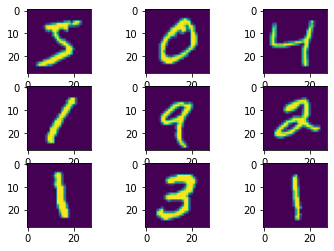

In [ ]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(400, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 400)               314000    
                                                                 
 dense_8 (Dense)             (None, 800)               320800    
                                                                 
 dense_9 (Dense)             (None, 400)               320400    
                                                                 
 dense_10 (Dense)            (None, 128)               51328     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,007,818
Trainable params: 1,007,818
No

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300, batch_size=512, verbose=1)

Epoch 1/300
118/118 [==============================] - 1s 6ms/step - loss: 1.0729e-10 - accuracy: 1.0000 - val_loss: 1.3583 - val_accuracy: 0.9843
Epoch 2/300
118/118 [==============================] - 1s 5ms/step - loss: 8.5433e-11 - accuracy: 1.0000 - val_loss: 1.3663 - val_accuracy: 0.9843
Epoch 3/300
118/118 [==============================] - 1s 5ms/step - loss: 1.0331e-10 - accuracy: 1.0000 - val_loss: 1.3737 - val_accuracy: 0.9843
Epoch 4/300
118/118 [==============================] - 1s 5ms/step - loss: 9.7354e-11 - accuracy: 1.0000 - val_loss: 1.3749 - val_accuracy: 0.9843
Epoch 5/300
118/118 [==============================] - 1s 5ms/step - loss: 9.5367e-11 - accuracy: 1.0000 - val_loss: 1.3838 - val_accuracy: 0.9842
Epoch 6/300
118/118 [==============================] - 1s 5ms/step - loss: 1.0133e-10 - accuracy: 1.0000 - val_loss: 1.3845 - val_accuracy: 0.9843
Epoch 7/300
118/118 [==============================] - 1s 5ms/step - loss: 7.9473e-11 - accuracy: 1.0000 - val_loss: 1

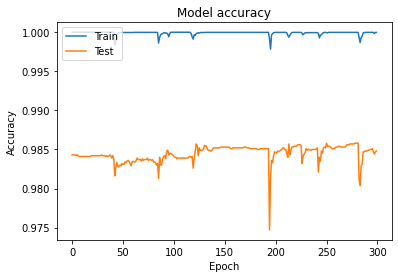

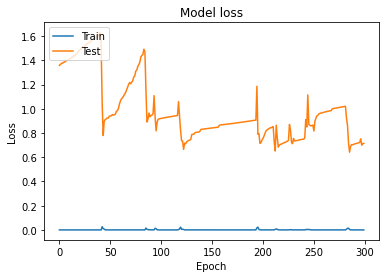

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, len(x_test))
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
# print(val_generator.classes)
print('Classification Report')
target_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five','Six', 'Seven', 'Eight', 'Nine']
print(classification_report(y_test, y_pred, target_names=target_names))

Confusion Matrix
[[ 972    1    2    0    0    2    1    2    0    0]
 [   1 1130    0    1    0    1    0    0    2    0]
 [   1    0 1022    0    1    1    2    4    1    0]
 [   0    0    3  992    0    7    0    4    3    1]
 [   2    1    2    0  962    2    3    1    0    9]
 [   2    0    0    7    0  880    1    0    1    1]
 [   4    3    0    0    1    4  944    0    2    0]
 [   3    0    8    2    0    2    0 1008    2    3]
 [   0    2    1    2    0    4    1    2  958    4]
 [   4    3    1    3    4   10    0    3    1  980]]
Classification Report
              precision    recall  f1-score   support

        Zero       0.98      0.99      0.99       980
         One       0.99      1.00      0.99      1135
         Two       0.98      0.99      0.99      1032
       Three       0.99      0.98      0.98      1010
        Four       0.99      0.98      0.99       982
        Five       0.96      0.99      0.98       892
         Six       0.99      0.99      0.99       9

Text(0.5, 1.0, 'Confusion Matrix')

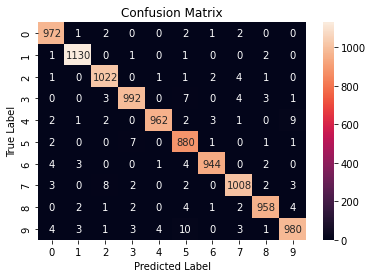

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_test, len(x_test))
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix,annot=True,cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])